In [92]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [93]:
# Load the cleaned datasets
customers = pd.read_csv('path_to_cleaned_customers_csv_file.csv')
checkouts = pd.read_csv('path_to_cleaned_checkouts_csv_file.csv')
books = pd.read_csv('path_to_cleaned_books_csv_file.csv')
libraries = pd.read_csv('path_to_cleaned_libraries_csv_file.csv')

In [94]:
# Display the first few rows of each dataframe
print(customers.head())
print(checkouts.head())
print(books.head())
print(libraries.head())


                          patron_id       city   state zipcode  \
0  df83ec2d0d409395c0d8c2690cfa8b67  portland   oregon   97213   
1  6aec7ab2ea0d67161dac39e5dcabd857   portland  oregon   97215   
2  0c54340672f510fdb9d2f30595c1ab53   portland  oregon   97214   
3  f0d9ce833ddc1f73c1e0b55bdebf012e   portland  oregon   97217   
4  3720379163f6b46944db6c98c0485bfd    unknown  oregon   97218   

            birth_date  gender        education          occupation  
0  2009-09-10 00:00:00  female      high school             unknown  
1  1956-12-15 00:00:00  female          college         blue collar  
2  1960-12-18 00:00:00    male          college  education & health  
3              unknown    male  graduate degree               sales  
4  1961-03-14 00:00:00    male  graduate degree         blue collar  
             id                         patron_id           library_id  \
0  HUX-y4oXl04C  8d3f63e1deed89d7ba1bf6a4eb101373  223-222@5xc-jxr-tgk   
1  TQpFnkku2poC  4ae202f8de76259173

In [95]:
# Basic summary statistics
print(customers.describe())
print(checkouts.describe())
print(books.describe())
print(libraries.describe())

                               patron_id      city   state zipcode birth_date  \
count                               2000      2000    2000    2000       2000   
unique                              2000        24       7      63       1645   
top     df83ec2d0d409395c0d8c2690cfa8b67  portland  oregon   97217    unknown   
freq                                   1      1660    1757     186        293   

       gender    education       occupation  
count    2000         2000             2000  
unique      3            5                8  
top      male  high school  admin & support  
freq      967          506              301  
                  id                         patron_id           library_id  \
count           1451                              1451                 1451   
unique           240                              1451                   18   
top     lMkmAQAAMAAJ  8d3f63e1deed89d7ba1bf6a4eb101373  223-222@5xc-jxr-tgk   
freq              14                            

In [96]:
# Check for missing values
print(customers.isnull().sum())
print(checkouts.isnull().sum())
print(books.isnull().sum())
print(libraries.isnull().sum())


patron_id     0
city          0
state         0
zipcode       0
birth_date    0
gender        0
education     0
occupation    0
dtype: int64
id               0
patron_id        0
library_id       0
date_checkout    0
date_returned    0
dtype: int64
id                0
title             0
publisher         0
published_date    0
categories        0
price             0
pages             0
dtype: int64
library_id        0
name              0
street_address    0
city              0
region            0
postal_code       0
dtype: int64


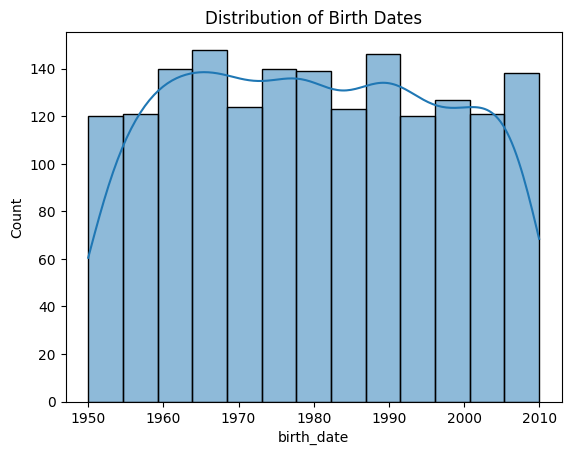

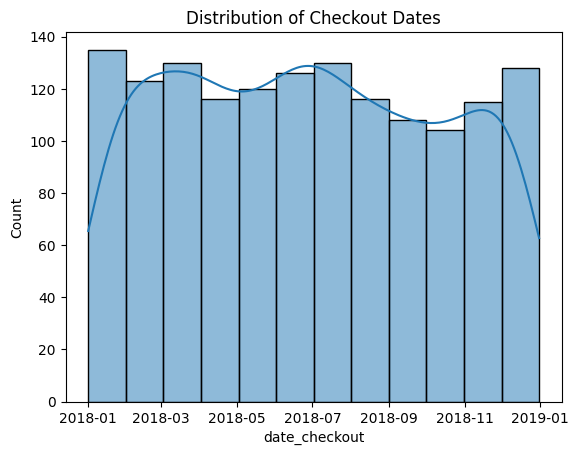

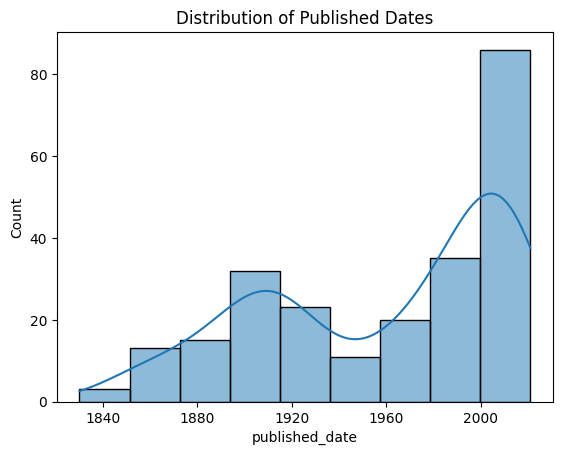

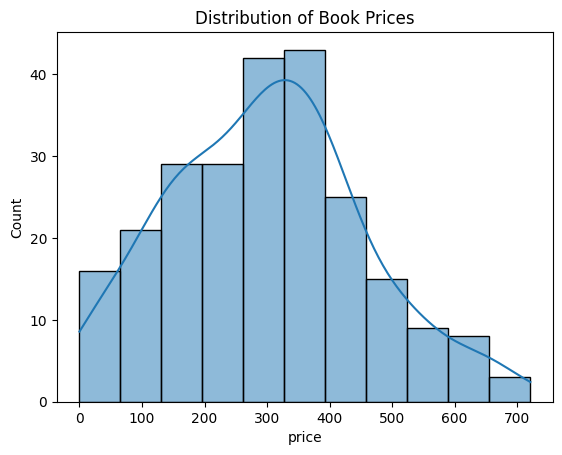

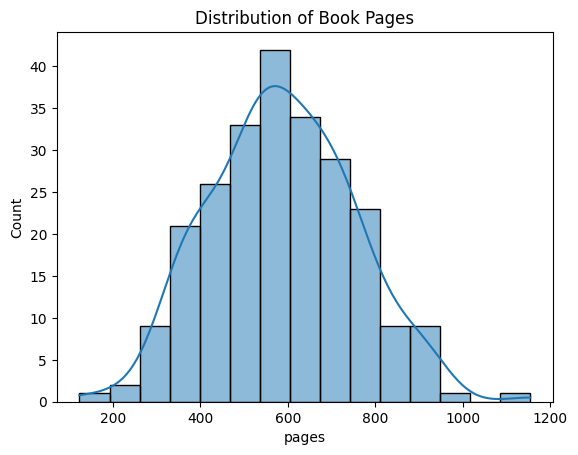

In [104]:
# Visualize the distribution of key columns
sns.histplot(customers['birth_date'].dropna(), kde=True)
plt.title('Distribution of Birth Dates')
plt.show()

sns.histplot(checkouts['date_checkout'].dropna(), kde=True)
plt.title('Distribution of Checkout Dates')
plt.show()

sns.histplot(books['published_date'].dropna(), kde=True)
plt.title('Distribution of Published Dates')
plt.show()

sns.histplot(books['price'].dropna(), kde=True)
plt.title('Distribution of Book Prices')
plt.show()

sns.histplot(books['pages'].dropna(), kde=True)
plt.title('Distribution of Book Pages')
plt.show()

In [105]:
# Data type conversions
# Convert published_date in books to datetime
books['published_date'] = pd.to_datetime(books['published_date'], errors='coerce')

# Clean and convert price in books to float
books['price'] = books['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert zipcode in customers to string
customers['zipcode'] = customers['zipcode'].astype(str)

# Convert birth_date in customers to datetime
customers['birth_date'] = pd.to_datetime(customers['birth_date'], errors='coerce')

# Convert postal_code in libraries to string
libraries['postal_code'] = libraries['postal_code'].astype(str)
# Convert date columns to datetime
checkouts['date_checkout'] = pd.to_datetime(checkouts['date_checkout'], errors='coerce')
checkouts['date_returned'] = pd.to_datetime(checkouts['date_returned'], errors='coerce')

In [106]:
# Calculate the late return flag
checkouts['is_late'] = (checkouts['date_returned'] - checkouts['date_checkout']).dt.days > 28

In [108]:
# Calculate the late return flag
checkouts['is_late'] = (checkouts['date_returned'] - checkouts['date_checkout']).dt.days > 28

# Merge checkouts with books, customers, and libraries
checkout_details = checkouts.merge(books, on='id', how='left')  # Assuming 'id' in books is the book ID
checkout_details = checkout_details.merge(customers, on='patron_id', how='left')
checkout_details = checkout_details.merge(libraries, on='library_id', how='left')

# Analysis by gender
late_by_gender = checkout_details.groupby('gender')['is_late'].mean()

# Analysis by education
late_by_education = checkout_details.groupby('education')['is_late'].mean()

# Analysis by occupation
late_by_occupation = checkout_details.groupby('occupation')['is_late'].mean()

# Analysis by library
late_by_library = checkout_details.groupby('name')['is_late'].mean()

# Save the combined dataset for review
checkout_details.to_csv('path_to_combined_dataset.csv', index=False)

# Optionally export the aggregated data to CSV
late_by_gender.to_csv('path_to_late_by_gender.csv')
late_by_education.to_csv('path_to_late_by_education.csv')
late_by_occupation.to_csv('path_to_late_by_occupation.csv')
late_by_library.to_csv('path_to_late_by_library.csv')

# Print sample data to verify
print("Late Return Rate by Gender:")
print(late_by_gender)
print("\nLate Return Rate by Education:")
print(late_by_education)
print("\nLate Return Rate by Occupation:")
print(late_by_occupation)
print("\nLate Return Rate by Library:")
print(late_by_library)

Late Return Rate by Gender:
gender
female     0.087848
male       0.100287
unknown    0.028571
Name: is_late, dtype: float64

Late Return Rate by Education:
education
college            0.110787
graduate degree    0.081505
high school        0.079365
others             0.089855
unknown            0.106061
Name: is_late, dtype: float64

Late Return Rate by Occupation:
occupation
admin & support       0.097674
blue collar           0.080645
business & finance    0.118557
education & health    0.081731
others                0.079787
sales                 0.098901
tech                  0.096447
unknown               0.049383
Name: is_late, dtype: float64

Late Return Rate by Library:
name
Friends Of The Multnomah County Library       0.094595
Multnomah County Library                      0.124183
Multnomah County Library Albina               0.117647
Multnomah County Library Belmont              0.084337
Multnomah County Library Capitol Hill         0.047619
Multnomah County Library Centra

In [109]:
# calculate overall late return rate
total_late_rate = checkouts['is_late'].mean() * 100
print(f"Overall Late Return Rate: {total_late_rate:.2f}%")

Overall Late Return Rate: 9.10%


In [110]:
# Correct column names if necessary
late_by_gender.columns = ['Gender', 'Is Late']  # Adjust according to the actual column names printed out
late_by_education.columns = ['Education', 'Is Late']
late_by_occupation.columns = ['Occupation', 'Is Late']
late_by_library.columns = ['Name', 'Is Late']


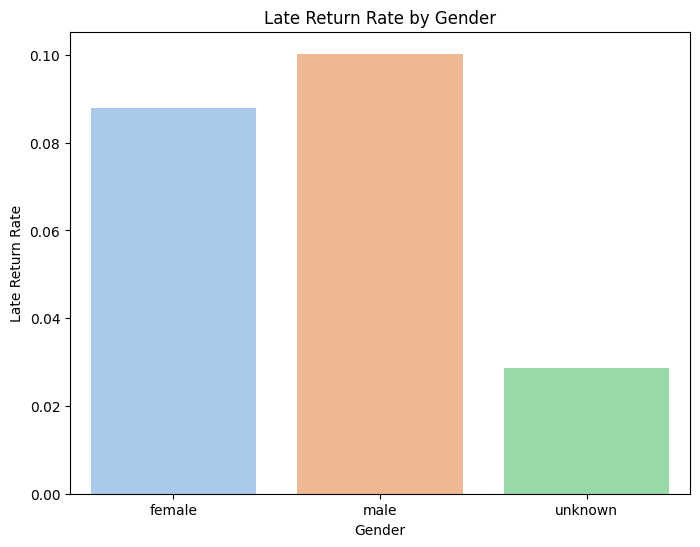

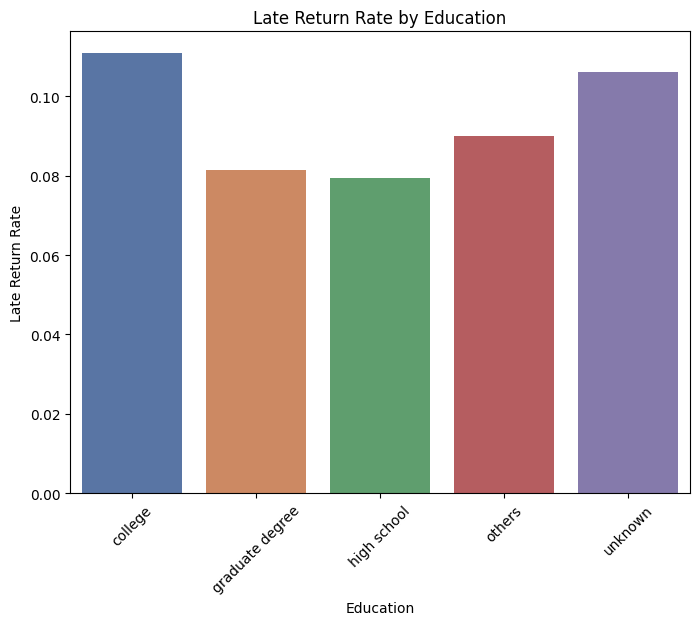

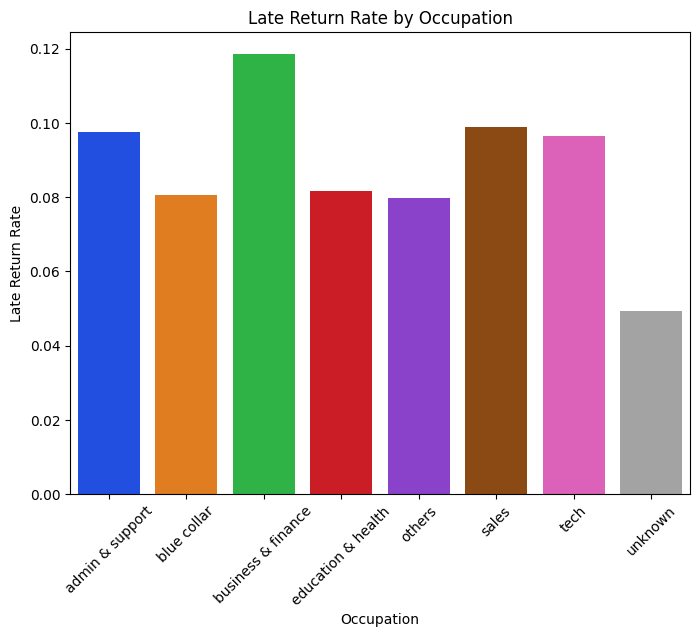

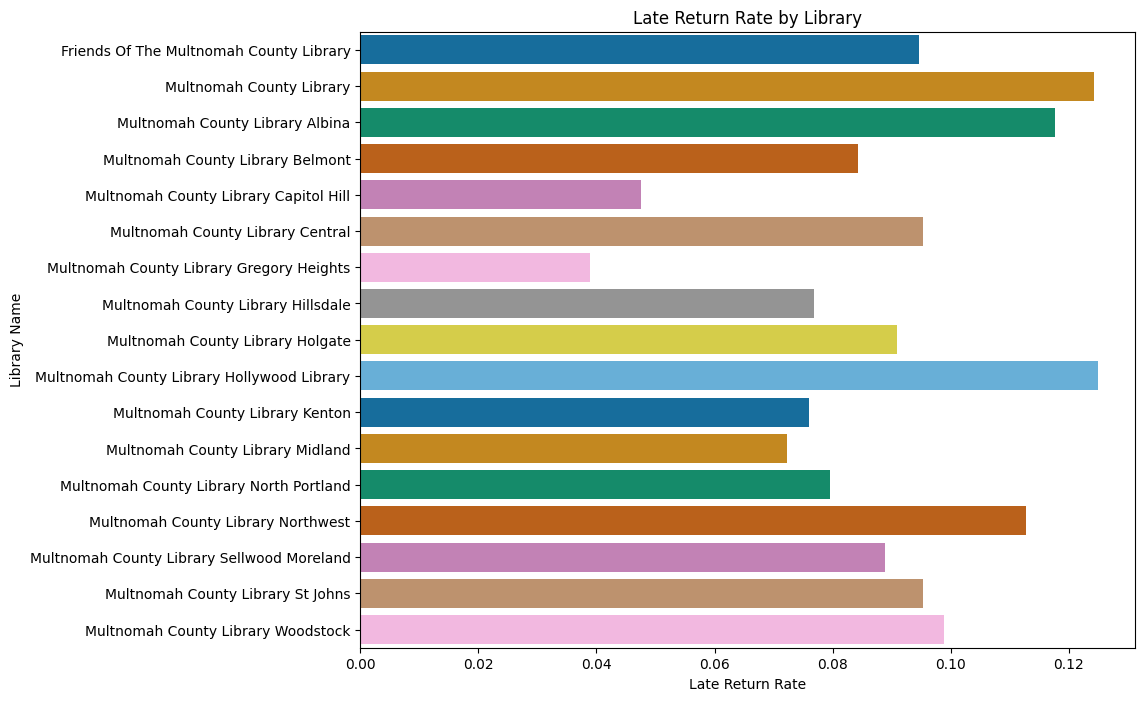

In [132]:
# Check if 'late_by_gender' is a Series and convert it to DataFrame if true
if isinstance(late_by_gender, pd.Series):
    late_by_gender = late_by_gender.reset_index()
    late_by_gender.columns = ['Gender', 'Is Late']

if isinstance(late_by_education, pd.Series):
    late_by_education = late_by_education.reset_index()
    late_by_education.columns = ['Education', 'Is Late']

if isinstance(late_by_occupation, pd.Series):
    late_by_occupation = late_by_occupation.reset_index()
    late_by_occupation.columns = ['Occupation', 'Is Late']

if isinstance(late_by_library, pd.Series):
    late_by_library = late_by_library.reset_index()
    late_by_library.columns = ['Library Name', 'Is Late']

# Gender Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Is Late', data=late_by_gender, palette='pastel')
plt.title('Late Return Rate by Gender')
plt.ylabel('Late Return Rate')
plt.show()

# Education Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='Is Late', data=late_by_education, palette='deep')
plt.title('Late Return Rate by Education')
plt.ylabel('Late Return Rate')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

# Occupation Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Occupation', y='Is Late', data=late_by_occupation, palette='bright')
plt.title('Late Return Rate by Occupation')
plt.ylabel('Late Return Rate')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

# Library Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Is Late', y='Library Name', data=late_by_library, palette='colorblind', orient='h')
plt.title('Late Return Rate by Library')
plt.xlabel('Late Return Rate')
plt.ylabel('Library Name')
plt.show()

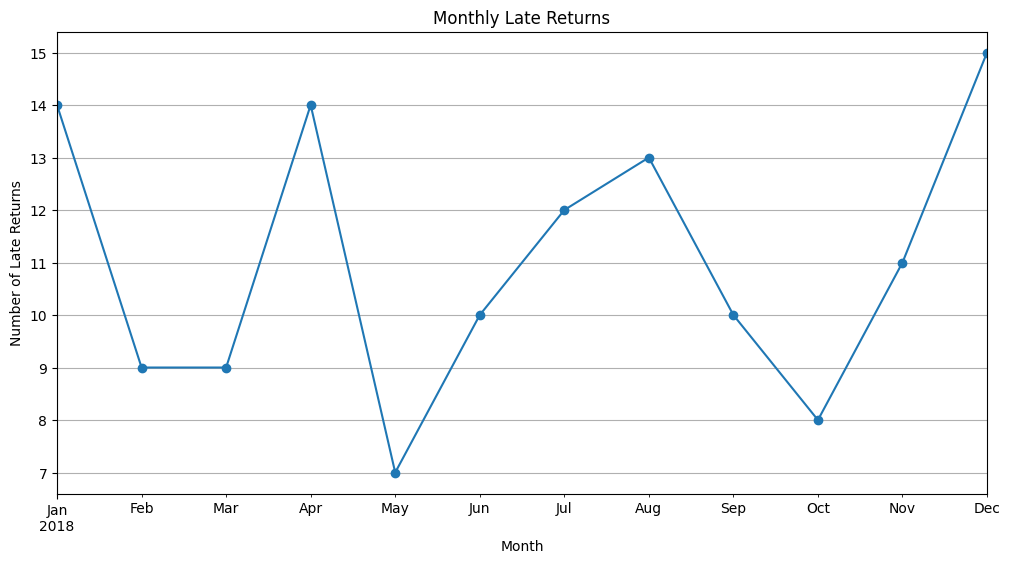

In [ ]:
# time series analysis by each month for late returns
checkouts['month'] = checkouts['date_checkout'].dt.to_period('M')
monthly_late_returns = checkouts.groupby('month')['is_late'].sum()

# Plotting
plt.figure(figsize=(12, 6))
monthly_late_returns.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Late Returns')
plt.xlabel('Month')
plt.ylabel('Number of Late Returns')
plt.grid(True)
plt.show()

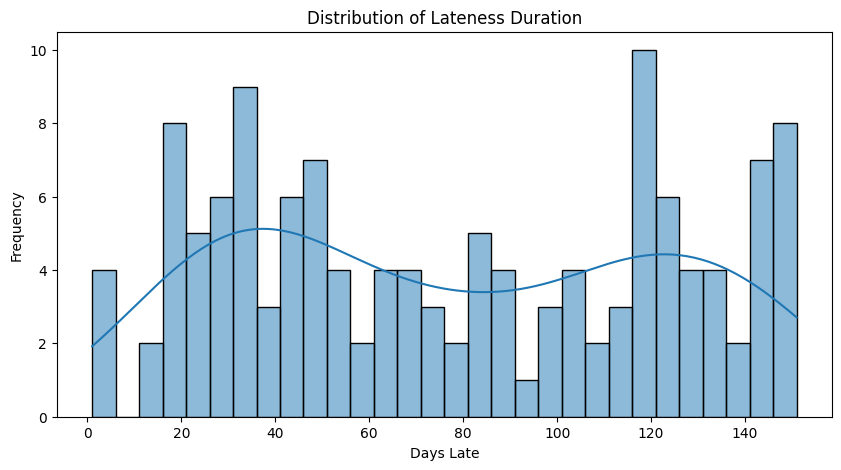

In [ ]:
# Calculate the lateness duration only for late books
checkouts['lateness_duration'] = (checkouts['date_returned'] - checkouts['date_checkout']).dt.days - 28
lateness_only = checkouts[checkouts['is_late']]['lateness_duration']

# Plotting
plt.figure(figsize=(10, 5))
sns.histplot(lateness_only, bins=30, kde=True)
plt.title('Distribution of Lateness Duration')
plt.xlabel('Days Late')
plt.ylabel('Frequency')
plt.show()

In the above graph we can see duration of late returns with peaks showing the most common durations for late returns. We can see here that most late books are returned between 20 and 50 days line or 120 to 160 while middle days being less frequent. One assumption here could be that people are more likely to return if they are not too late but past 2 months they might for some reason return less and continue returning more from 4th month.

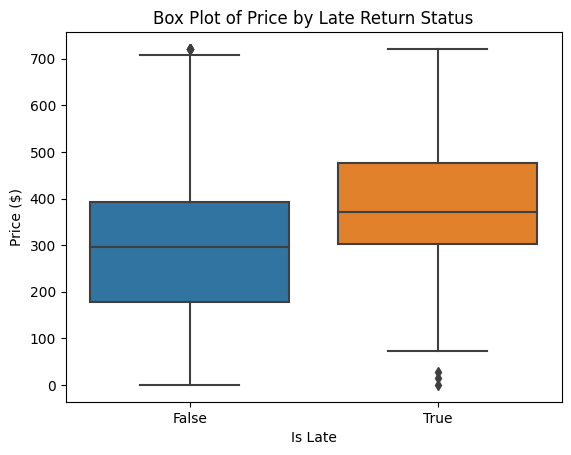

In [ ]:
# Merge checkouts with books data
checkout_books = checkouts.merge(books, on='id', how='left')

# Convert price to numeric, removing non-numeric characters
checkout_books['price'] = checkout_books['price'].replace('[^\d.]', '', regex=True).astype(float)

# Convert 'is_late' back to category for plotting
checkout_books['is_late'] = checkout_books['is_late'].astype('category')

# Create a box plot
sns.boxplot(x='is_late', y='price', data=checkout_books)
plt.title('Box Plot of Price by Late Return Status')
plt.xlabel('Is Late')
plt.ylabel('Price ($)')
plt.show()

Median Price: The median price of books that were returned late is higher than those returned on time.   
Interquartile Range (IQR): The IQR (the middle 50% of data) for late returns is shifted higher compared to on-time returns, indicating that late-returned books tend to be more expensive.   
Outliers: Both late and on-time returns have outliers, but the range for late returns is generally higher.  

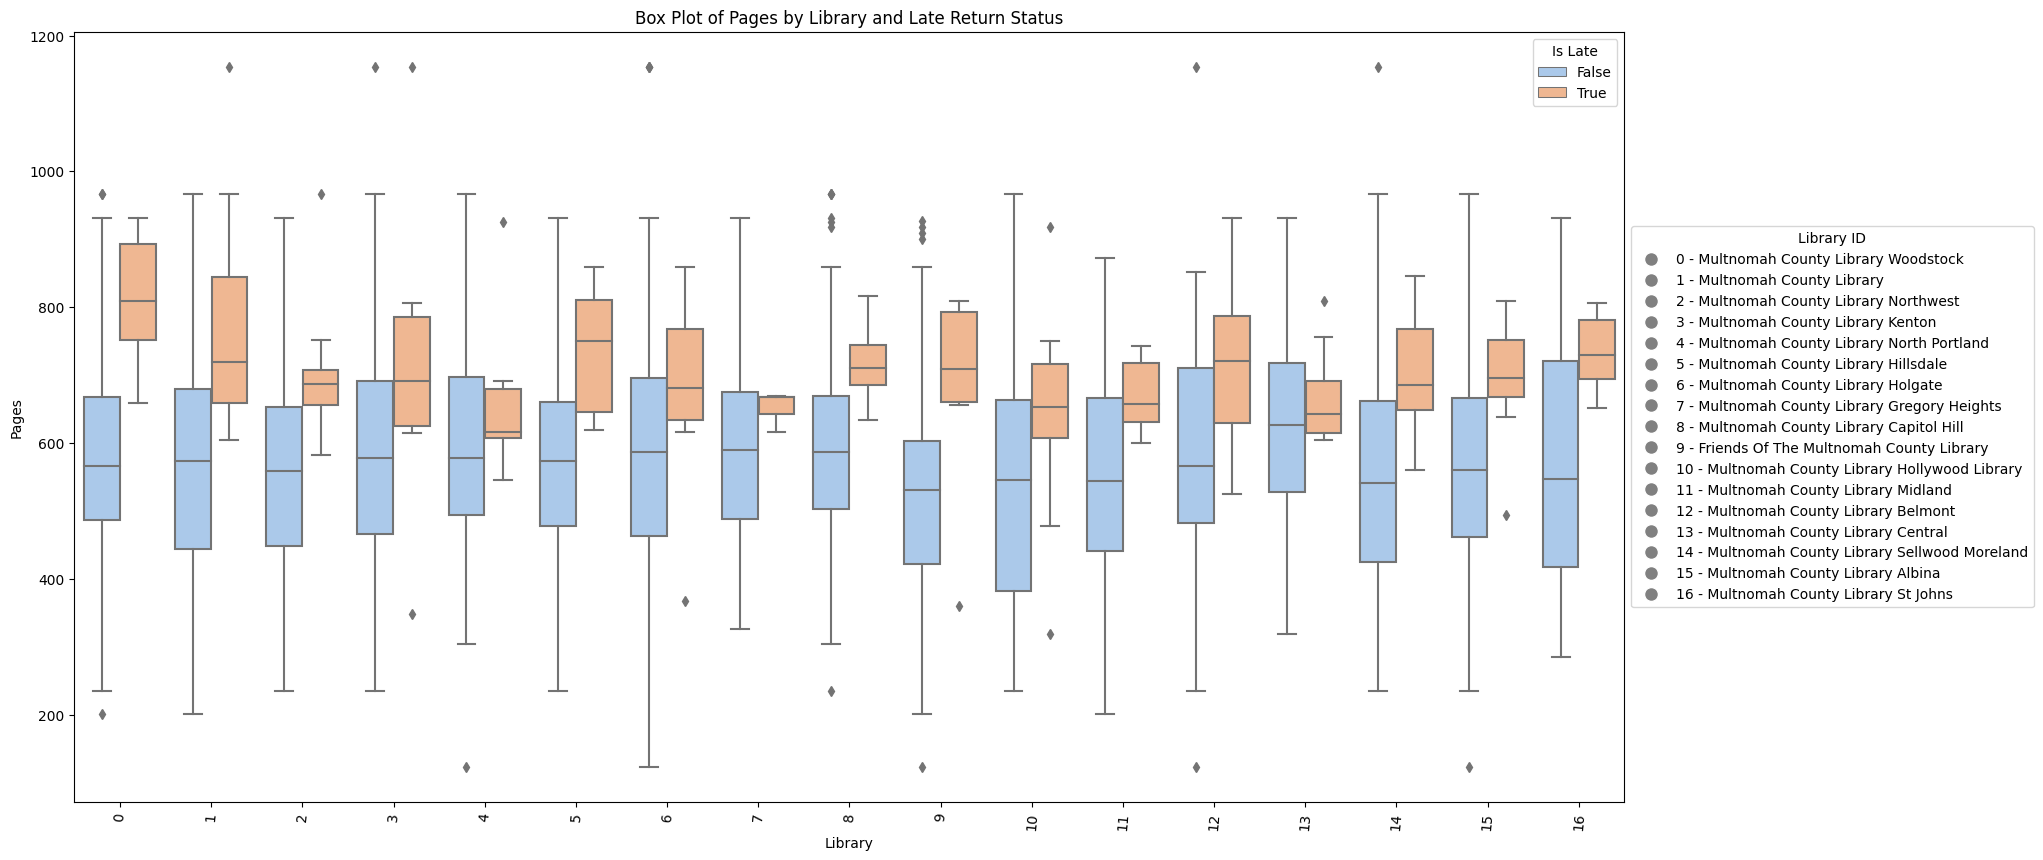

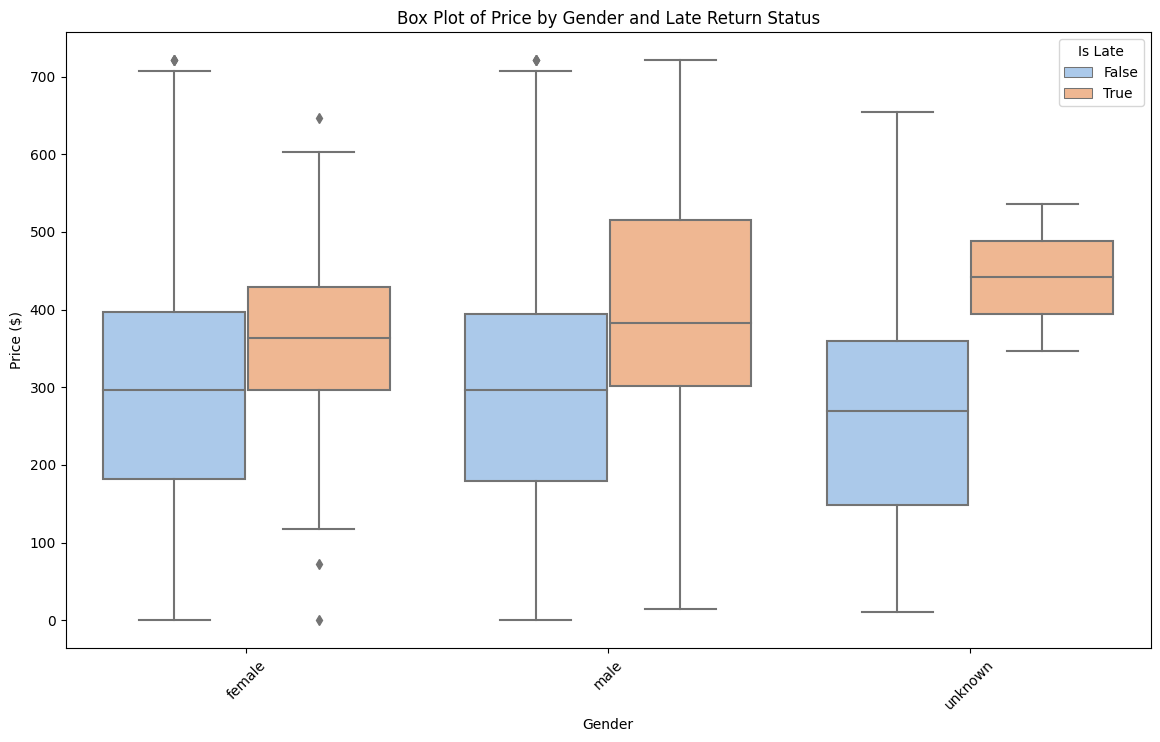

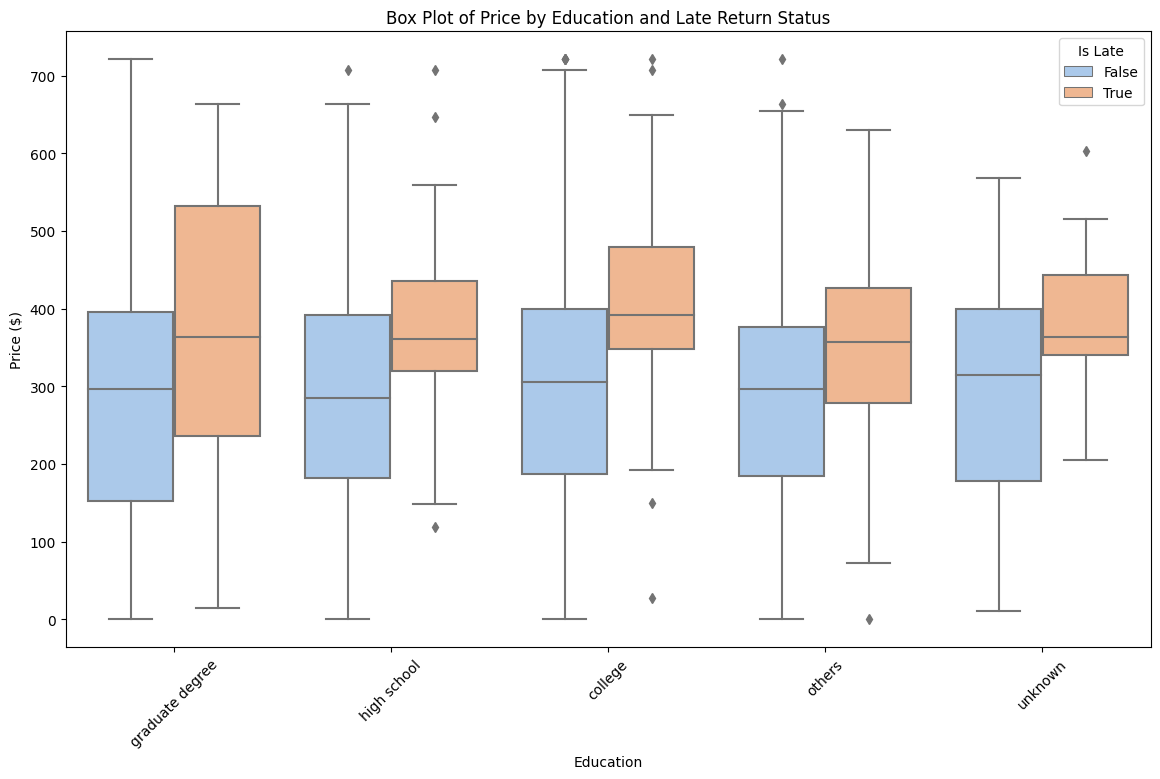

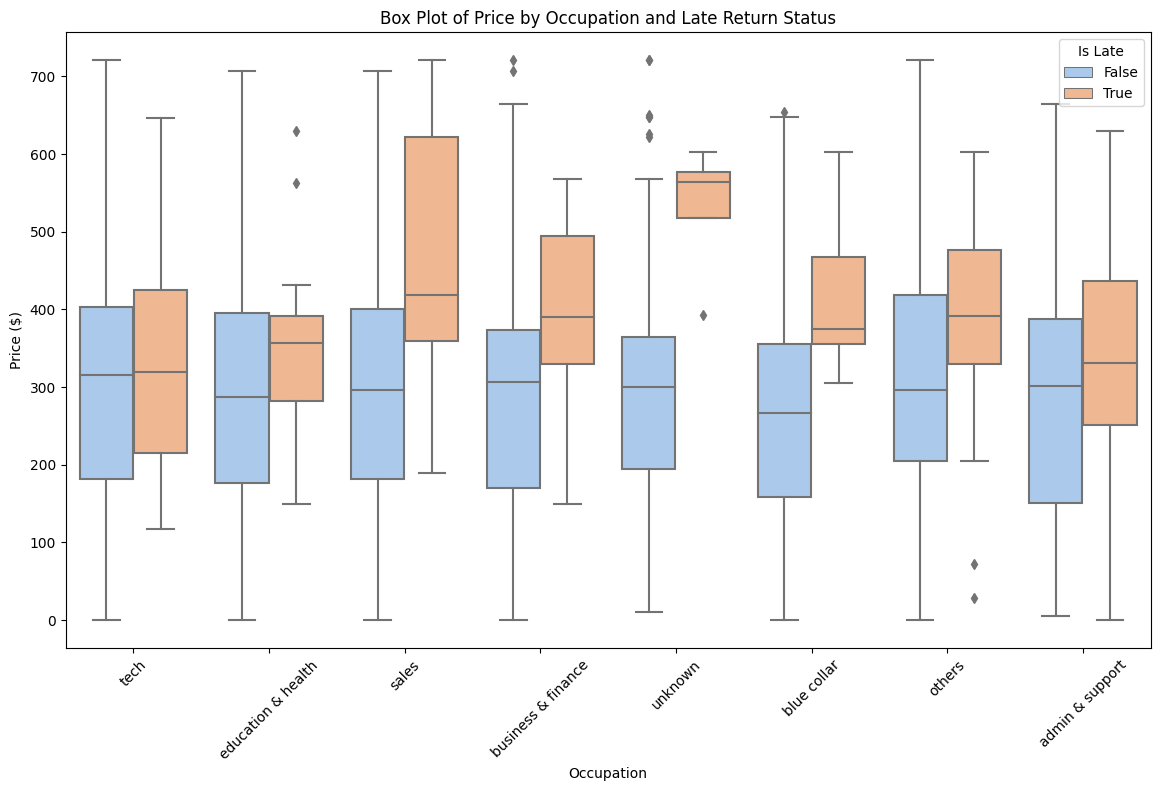

In [158]:
# Load the combined dataset
combined_data = pd.read_csv('path_to_combined_dataset.csv')

# Calculate the late return flag
combined_data['is_late'] = (pd.to_datetime(combined_data['date_returned']) - pd.to_datetime(combined_data['date_checkout'])).dt.days > 28

# Box plots for different libraries with additional legend
# Create a dictionary for library name mapping
library_mapping = {name: idx for idx, name in enumerate(combined_data['name'].unique())}

# Replace library names with their corresponding numbers
combined_data['library_num'] = combined_data['name'].map(library_mapping)

# Box plots for different libraries with additional legend
plt.figure(figsize=(20, 10))
sns.boxplot(x='library_num', y='pages', hue='is_late', data=combined_data, palette='pastel')
plt.title('Box Plot of Pages by Library and Late Return Status')
plt.xlabel('Library')
plt.ylabel('Pages')
plt.xticks(rotation=85)

# Add a legend for the library mapping
handles, _ = plt.gca().get_legend_handles_labels()
library_legend = plt.legend(handles=handles, title='Is Late', loc='upper right')
plt.gca().add_artist(library_legend)

# Create a second legend for the library names
library_legend_elements = [plt.Line2D([0], [0], color='w', marker='o', label=f'{idx} - {name}', markersize=10, markerfacecolor='grey') for name, idx in library_mapping.items()]
plt.legend(handles=library_legend_elements, title='Library ID', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Box plots for gender
plt.figure(figsize=(14, 8))
sns.boxplot(x='gender', y='price', hue='is_late', data=combined_data, palette='pastel')
plt.title('Box Plot of Price by Gender and Late Return Status')
plt.xlabel('Gender')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Is Late', loc='upper right')
plt.show()

# Box plots for education
plt.figure(figsize=(14, 8))
sns.boxplot(x='education', y='price', hue='is_late', data=combined_data, palette='pastel')
plt.title('Box Plot of Price by Education and Late Return Status')
plt.xlabel('Education')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Is Late', loc='upper right')
plt.show()

# Box plots for occupation
plt.figure(figsize=(14, 8))
sns.boxplot(x='occupation', y='price', hue='is_late', data=combined_data, palette='pastel')
plt.title('Box Plot of Price by Occupation and Late Return Status')
plt.xlabel('Occupation')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Is Late', loc='upper right')
plt.show()

             is_late     price     pages  categories    gender  education  \
is_late     1.000000  0.154516  0.220035   -0.061243 -0.009177  -0.017830   
price       0.154516  1.000000  0.740224   -0.068065 -0.021505  -0.034457   
pages       0.220035  0.740224  1.000000   -0.087519 -0.008814  -0.019709   
categories -0.061243 -0.068065 -0.087519    1.000000 -0.007739   0.025844   
gender     -0.009177 -0.021505 -0.008814   -0.007739  1.000000   0.009738   
education  -0.017830 -0.034457 -0.019709    0.025844  0.009738   1.000000   
occupation -0.016910  0.061177  0.021037    0.008169  0.018070  -0.019223   
library_id  0.013503  0.030733  0.009311    0.055415  0.025363   0.015444   

            occupation  library_id  
is_late      -0.016910    0.013503  
price         0.061177    0.030733  
pages         0.021037    0.009311  
categories    0.008169    0.055415  
gender        0.018070    0.025363  
education    -0.019223    0.015444  
occupation    1.000000   -0.045214  
library_id

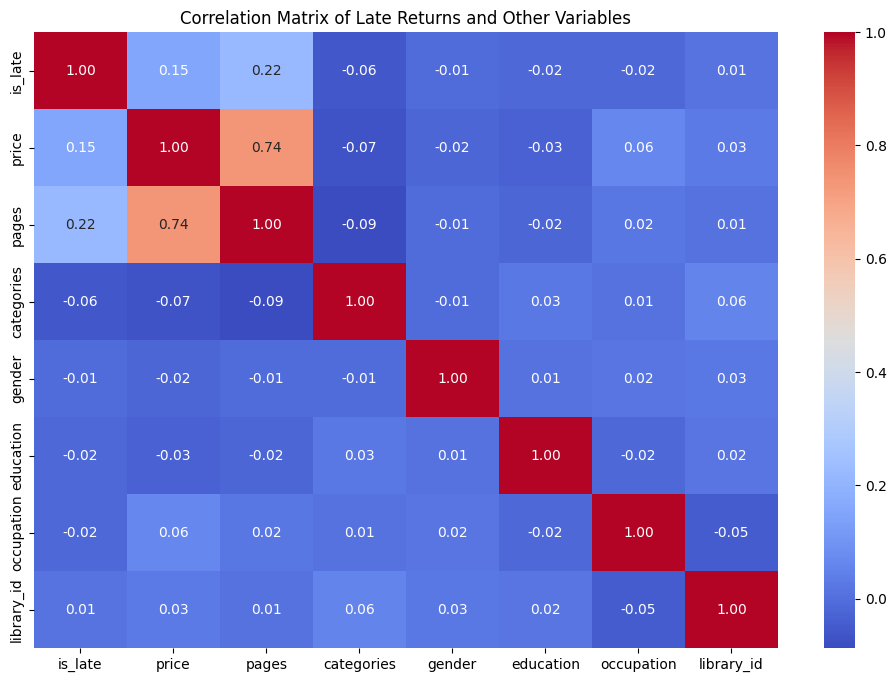

In [ ]:
# Convert categorical data to numeric for correlation analysis
combined_data['gender'] = combined_data['gender'].astype('category').cat.codes
combined_data['education'] = combined_data['education'].astype('category').cat.codes
combined_data['occupation'] = combined_data['occupation'].astype('category').cat.codes
combined_data['categories'] = combined_data['categories'].astype('category').cat.codes
combined_data['library_id'] = combined_data['library_id'].astype('category').cat.codes

# Convert price and pages to numeric, handling 'unknown' values
combined_data['price'] = combined_data['price'].replace('[^\d.]', '', regex=True).replace('', '0').astype(float)
combined_data['pages'] = pd.to_numeric(combined_data['pages'], errors='coerce').fillna(0)

# Correlation matrix
correlation_matrix = combined_data[['is_late', 'price', 'pages', 'categories', 'gender', 'education', 'occupation', 'library_id']].corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Late Returns and Other Variables')
plt.show()

In [ ]:
# Convert the dates to datetime format
combined_data['date_checkout'] = pd.to_datetime(combined_data['date_checkout'])
combined_data['date_returned'] = pd.to_datetime(combined_data['date_returned'])

# Calculate the number of days between checkout and return
combined_data['days_between'] = (combined_data['date_returned'] - combined_data['date_checkout']).dt.days

# Calculate the number of months between checkout and return
combined_data['months_between'] = combined_data['days_between'] / 30  # Approximate conversion to months

# Filter the data to include only those books returned after 3 months
books_returned_after_3_months = combined_data[combined_data['months_between'] > 3]

# Calculate the percentage
percentage_after_3_months = (len(books_returned_after_3_months) / len(combined_data)) * 100

print(f"The percentage of books returned after 3 months is {percentage_after_3_months:.2f}%")

The percentage of books returned after 3 months is 5.17%


In [123]:
# Identify libraries with high late return rates
high_late_returns = combined_data[combined_data['is_late'] == 1].groupby('library_id').size().sort_values(ascending=False)

# Display top 5 libraries with most late returns
print(high_late_returns.head())

# Further analysis on the selected library, e.g., library with ID equal to the highest late returns
library_focus = combined_data[combined_data['library_id'] == high_late_returns.idxmax()]

# Analyze demographic factors, book categories, or other relevant metrics for this library
demographic_analysis = library_focus.groupby('gender').size()
book_category_analysis = library_focus.groupby('categories').size()

print(demographic_analysis)
print(book_category_analysis)

library_id
222-222@5xc-jxp-rp9    10
225-222@5xc-jtz-hkf    10
zzw-222@5xc-jv4-789    10
228-222@5xc-jtz-hwk     9
223-222@5xc-jxr-tgk     9
dtype: int64
gender
female     38
male       38
unknown     4
dtype: int64
categories
Unknown                            15
["Mechanics' institutes"]           1
['Administrative agencies']         1
['Advertising']                     2
['Agricultural education']          1
['Aircraft industry']               1
['Biology']                         1
['Business & Economics']           13
['Central Provinces (India)']       1
['Computers']                       1
['Corliss steam-engine']            1
['Electronic books']                1
['Emigration and immigration']      1
['Environmental law']               1
['Fire engines']                    2
['Government publications']         1
['Historical Card']                 2
['Hydrology']                       1
['Industries']                      2
['Internal combustion engines']     2
['Language Ar

In [134]:
# Load the data
df = pd.read_csv('path_to_combined_dataset.csv')

# Checking the DataFrame to ensure it's loaded correctly
print(df.head())


             id                         patron_id           library_id  \
0  HUX-y4oXl04C  8d3f63e1deed89d7ba1bf6a4eb101373  223-222@5xc-jxr-tgk   
1  TQpFnkku2poC  4ae202f8de762591734705e0079d76df  228-222@5xc-jtz-hwk   
2  OQ6sDwAAQBAJ  f9372de3c8ea501601aa3fb59ec0f524  23v-222@5xc-jv7-v4v   
3  CW-7tHAaVR0C  dd9f34e9d65126a2b02003d8ac60aaa4  22c-222@5xc-jwj-pvz   
4  t1e3BWziAc8C  3b85b2c7b424618f533329018e9a11d5  222-222@5xc-jv5-nt9   

  date_checkout date_returned  is_late  \
0    2018-05-29    2018-06-12    False   
1    2018-11-23    2019-01-24     True   
2    2018-01-15    2018-04-25     True   
3    2018-01-10    2018-02-04    False   
4    2018-06-23    2018-07-14    False   

                                               title  \
0                         Indian Financial System 5E   
1                             Advertising Management   
2  New Technologies for Emission Control in Marin...   
3     Geostatistics for Natural Resources Evaluation   
4         Highlights o

In [169]:
# Preparing the data
X = df[['price', 'gender', 'education', 'occupation','pages',]]  # Including relevant features
y = df['is_late']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Random Forest model(changed from regression to random forest to understand individual features better and prevent multicollinearity)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance = sorted(zip(importances, feature_names), reverse=True)

print("Feature Importance:")
for importance, name in feature_importance:
    print(f"{name}: {importance:.4f}")


Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.97      0.96       275
        True       0.22      0.12      0.16        16

    accuracy                           0.93       291
   macro avg       0.59      0.55      0.56       291
weighted avg       0.91      0.93      0.92       291

Feature Importance:
pages: 0.3417
price: 0.2791
occupation: 0.1796
education: 0.1266
gender: 0.0730


In [136]:
# Load the data
df = pd.read_csv('path_to_combined_dataset.csv')

# Calculating late return rates by library
library_late_rates = df.groupby('library_id')['is_late'].mean().sort_values(ascending=False)

# Identifying top 5 libraries with the highest late return rates
top_libraries = library_late_rates.head(5).index
print("Top 5 Libraries with High Late Return Rates:", top_libraries)

# Filtering the dataset for these top libraries
top_lib_data = df[df['library_id'].isin(top_libraries)]

Top 5 Libraries with High Late Return Rates: Index(['228-222@5xc-jtz-hwk', '222-222@5xc-jxp-rp9', '225-222@5xc-jtz-hkf',
       'zzw-222@5xc-jv4-789', '23v-222@5xc-jv7-v4v'],
      dtype='object', name='library_id')


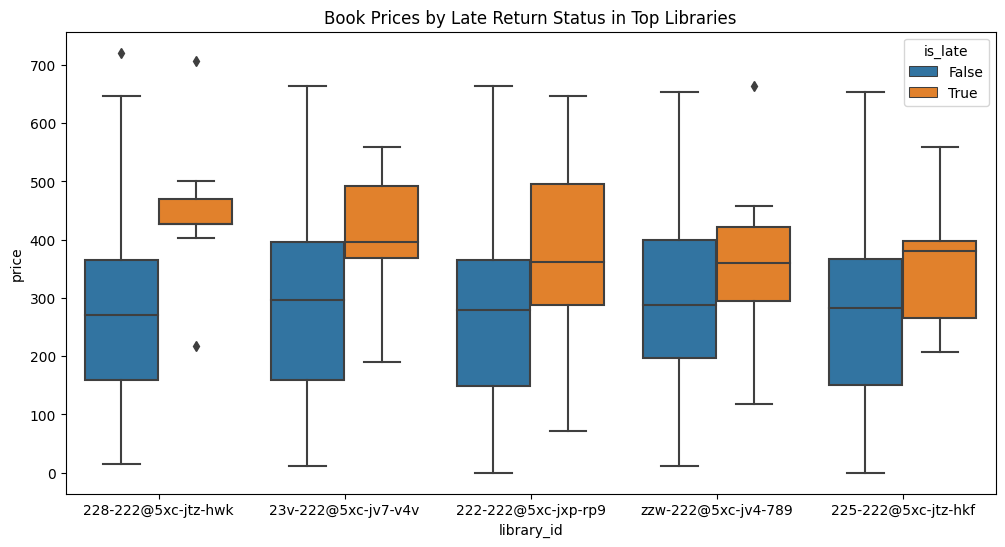

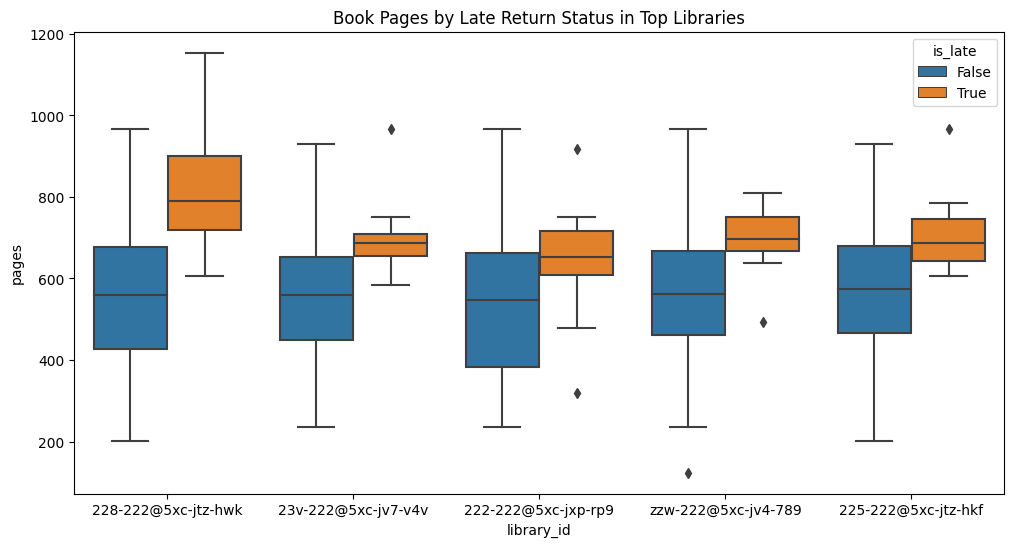

In [137]:
# Examining the distribution of book prices and pages in these libraries
plt.figure(figsize=(12, 6))
sns.boxplot(x='library_id', y='price', hue='is_late', data=top_lib_data)
plt.title('Book Prices by Late Return Status in Top Libraries')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='library_id', y='pages', hue='is_late', data=top_lib_data)
plt.title('Book Pages by Late Return Status in Top Libraries')
plt.show()


In [152]:
#Calculate the rate of late returns by library
late_return_rates = df.groupby('library_id')['is_late'].mean().sort_values(ascending=False)

# Identify the top 5 libraries with the highest late return rates
top_5_libraries = late_return_rates.head(5).index

# Add a new column to differentiate between top 5 libraries and others
df['is_top_5'] = df['library_id'].apply(lambda x: 'Top 5' if x in top_5_libraries else 'Other')

# Descriptive statistics for numeric variables
numeric_stats = df.groupby('is_top_5')[['price', 'pages']].describe()

# Frequency counts for categorical variables
gender_counts = df.groupby(['is_top_5', 'gender']).size().unstack(fill_value=0)
education_counts = df.groupby(['is_top_5', 'education']).size().unstack(fill_value=0)
occupation_counts = df.groupby(['is_top_5', 'occupation']).size().unstack(fill_value=0)

# Print results
print("Numeric Statistics for Price and Pages:")
print(numeric_stats)
print("\nGender Distribution:")
print(gender_counts)
print("\nEducation Distribution:")
print(education_counts)
print("\nOccupation Distribution:")
print(occupation_counts)

Numeric Statistics for Price and Pages:
           price                                                           \
           count        mean         std  min    25%    50%    75%    max   
is_top_5                                                                    
Other     1062.0  304.237288  163.083224  0.0  190.0  305.0  400.0  721.0   
Top 5      389.0  296.876607  159.205470  0.0  177.0  300.0  400.0  721.0   

           pages                                                              
           count        mean         std    min    25%    50%    75%     max  
is_top_5                                                                      
Other     1062.0  592.426554  170.168381  124.0  487.0  587.0  703.0  1154.0  
Top 5      389.0  586.051414  171.684866  124.0  465.0  583.0  684.0  1154.0  

Gender Distribution:
gender    female  male  unknown
is_top_5                       
Other        491   519       52
Top 5        192   179       18

Education Distribution:
educ